## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.444325  0.400866  1.023446  0.538937 -1.356159  0.980810
1 -1.152226 -0.804617 -0.480866 -1.409351 -0.284585 -1.914209
2  1.577728  0.369696  0.299915 -0.912194  0.501091  0.300568
3  0.935928 -0.831543  1.445813  1.759845  0.394962  1.557944
4  0.090712 -0.020985 -1.462313 -1.253514 -0.969928 -0.357380


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9097908	total: 57.8ms	remaining: 57.8s
1:	learn: 0.9025623	total: 58.4ms	remaining: 29.1s
2:	learn: 0.8916497	total: 59ms	remaining: 19.6s
3:	learn: 0.8827270	total: 59.6ms	remaining: 14.8s
4:	learn: 0.8741328	total: 60ms	remaining: 11.9s
5:	learn: 0.8649964	total: 60.6ms	remaining: 10s
6:	learn: 0.8552497	total: 61.2ms	remaining: 8.68s
7:	learn: 0.8466789	total: 61.7ms	remaining: 7.65s
8:	learn: 0.8371864	total: 62.2ms	remaining: 6.85s
9:	learn: 0.8287995	total: 62.7ms	remaining: 6.21s
10:	learn: 0.8205994	total: 63.3ms	remaining: 5.69s
11:	learn: 0.8111892	total: 63.9ms	remaining: 5.26s
12:	learn: 0.8022881	total: 64.4ms	remaining: 4.89s
13:	learn: 0.7947478	total: 64.8ms	remaining: 4.57s
14:	learn: 0.7876507	total: 65.3ms	remaining: 4.29s
15:	learn: 0.7797614	total: 65.7ms	remaining: 4.04s
16:	learn: 0.7722310	total: 66.1ms	remaining: 3.82s
17:	learn: 0.7649437	total: 66.5ms	remaining: 3.63s
18:	learn: 0.7575310	total: 66.9ms	remaining: 3.45

109:	learn: 0.3350917	total: 109ms	remaining: 879ms
110:	learn: 0.3327204	total: 109ms	remaining: 875ms
111:	learn: 0.3309167	total: 110ms	remaining: 871ms
112:	learn: 0.3281467	total: 110ms	remaining: 867ms
113:	learn: 0.3259658	total: 111ms	remaining: 862ms
114:	learn: 0.3240035	total: 111ms	remaining: 857ms
115:	learn: 0.3217873	total: 112ms	remaining: 852ms
116:	learn: 0.3187129	total: 112ms	remaining: 846ms
117:	learn: 0.3164070	total: 113ms	remaining: 843ms
118:	learn: 0.3141945	total: 113ms	remaining: 838ms
119:	learn: 0.3117064	total: 114ms	remaining: 834ms
120:	learn: 0.3093755	total: 114ms	remaining: 829ms
121:	learn: 0.3071455	total: 115ms	remaining: 824ms
122:	learn: 0.3050770	total: 115ms	remaining: 820ms
123:	learn: 0.3029462	total: 115ms	remaining: 816ms
124:	learn: 0.3008271	total: 116ms	remaining: 811ms
125:	learn: 0.2987181	total: 116ms	remaining: 807ms
126:	learn: 0.2967850	total: 117ms	remaining: 803ms
127:	learn: 0.2947952	total: 117ms	remaining: 798ms
128:	learn: 

272:	learn: 0.1153246	total: 187ms	remaining: 497ms
273:	learn: 0.1146759	total: 187ms	remaining: 496ms
274:	learn: 0.1139701	total: 188ms	remaining: 495ms
275:	learn: 0.1133097	total: 188ms	remaining: 493ms
276:	learn: 0.1127564	total: 189ms	remaining: 492ms
277:	learn: 0.1121136	total: 189ms	remaining: 491ms
278:	learn: 0.1114598	total: 189ms	remaining: 490ms
279:	learn: 0.1109338	total: 190ms	remaining: 488ms
280:	learn: 0.1101686	total: 190ms	remaining: 487ms
281:	learn: 0.1096555	total: 191ms	remaining: 485ms
282:	learn: 0.1088866	total: 191ms	remaining: 484ms
283:	learn: 0.1082410	total: 191ms	remaining: 483ms
284:	learn: 0.1075042	total: 192ms	remaining: 482ms
285:	learn: 0.1069143	total: 192ms	remaining: 480ms
286:	learn: 0.1062551	total: 193ms	remaining: 479ms
287:	learn: 0.1055557	total: 193ms	remaining: 478ms
288:	learn: 0.1049278	total: 194ms	remaining: 477ms
289:	learn: 0.1042512	total: 194ms	remaining: 476ms
290:	learn: 0.1035725	total: 195ms	remaining: 474ms
291:	learn: 

503:	learn: 0.0324595	total: 291ms	remaining: 287ms
504:	learn: 0.0322813	total: 292ms	remaining: 286ms
505:	learn: 0.0321177	total: 293ms	remaining: 286ms
506:	learn: 0.0319437	total: 293ms	remaining: 285ms
507:	learn: 0.0317853	total: 294ms	remaining: 285ms
508:	learn: 0.0316154	total: 294ms	remaining: 284ms
509:	learn: 0.0315441	total: 295ms	remaining: 283ms
510:	learn: 0.0313439	total: 295ms	remaining: 283ms
511:	learn: 0.0311365	total: 296ms	remaining: 282ms
512:	learn: 0.0309973	total: 296ms	remaining: 281ms
513:	learn: 0.0308615	total: 296ms	remaining: 280ms
514:	learn: 0.0307119	total: 297ms	remaining: 280ms
515:	learn: 0.0306433	total: 298ms	remaining: 279ms
516:	learn: 0.0305116	total: 298ms	remaining: 278ms
517:	learn: 0.0304441	total: 299ms	remaining: 278ms
518:	learn: 0.0303290	total: 299ms	remaining: 277ms
519:	learn: 0.0302009	total: 300ms	remaining: 277ms
520:	learn: 0.0301345	total: 300ms	remaining: 276ms
521:	learn: 0.0300095	total: 301ms	remaining: 275ms
522:	learn: 

662:	learn: 0.0154985	total: 369ms	remaining: 188ms
663:	learn: 0.0154290	total: 370ms	remaining: 187ms
664:	learn: 0.0153462	total: 370ms	remaining: 187ms
665:	learn: 0.0152750	total: 371ms	remaining: 186ms
666:	learn: 0.0152121	total: 371ms	remaining: 185ms
667:	learn: 0.0151341	total: 372ms	remaining: 185ms
668:	learn: 0.0150607	total: 372ms	remaining: 184ms
669:	learn: 0.0149942	total: 372ms	remaining: 183ms
670:	learn: 0.0149770	total: 373ms	remaining: 183ms
671:	learn: 0.0149587	total: 373ms	remaining: 182ms
672:	learn: 0.0148800	total: 374ms	remaining: 182ms
673:	learn: 0.0148033	total: 374ms	remaining: 181ms
674:	learn: 0.0147355	total: 375ms	remaining: 181ms
675:	learn: 0.0146682	total: 375ms	remaining: 180ms
676:	learn: 0.0146519	total: 376ms	remaining: 179ms
677:	learn: 0.0145924	total: 376ms	remaining: 179ms
678:	learn: 0.0145170	total: 377ms	remaining: 178ms
679:	learn: 0.0144485	total: 377ms	remaining: 178ms
680:	learn: 0.0143764	total: 378ms	remaining: 177ms
681:	learn: 

879:	learn: 0.0071802	total: 474ms	remaining: 64.7ms
880:	learn: 0.0071677	total: 475ms	remaining: 64.2ms
881:	learn: 0.0071581	total: 475ms	remaining: 63.6ms
882:	learn: 0.0071371	total: 476ms	remaining: 63.1ms
883:	learn: 0.0071305	total: 476ms	remaining: 62.5ms
884:	learn: 0.0071143	total: 477ms	remaining: 62ms
885:	learn: 0.0071050	total: 478ms	remaining: 61.4ms
886:	learn: 0.0070902	total: 478ms	remaining: 60.9ms
887:	learn: 0.0070756	total: 479ms	remaining: 60.4ms
888:	learn: 0.0070612	total: 479ms	remaining: 59.8ms
889:	learn: 0.0070469	total: 480ms	remaining: 59.3ms
890:	learn: 0.0070406	total: 480ms	remaining: 58.7ms
891:	learn: 0.0070265	total: 480ms	remaining: 58.2ms
892:	learn: 0.0070043	total: 481ms	remaining: 57.6ms
893:	learn: 0.0069830	total: 481ms	remaining: 57.1ms
894:	learn: 0.0069664	total: 482ms	remaining: 56.5ms
895:	learn: 0.0069527	total: 482ms	remaining: 56ms
896:	learn: 0.0069365	total: 483ms	remaining: 55.5ms
897:	learn: 0.0069229	total: 484ms	remaining: 54.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

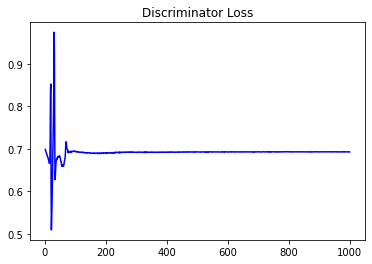

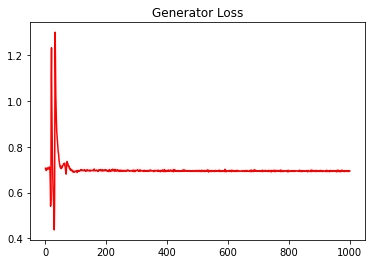

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07627415654633347


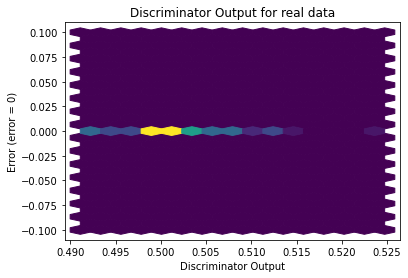

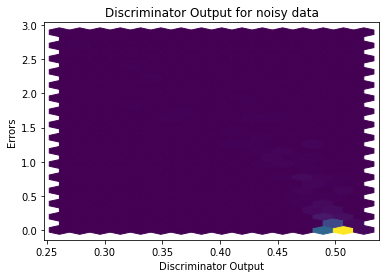

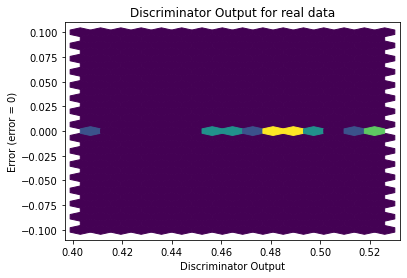

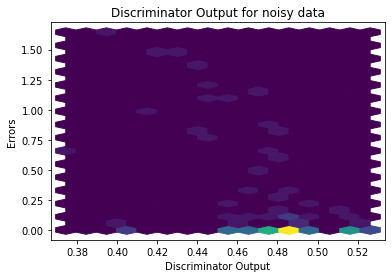

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


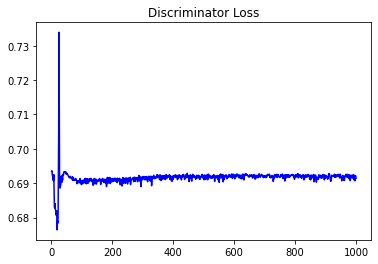

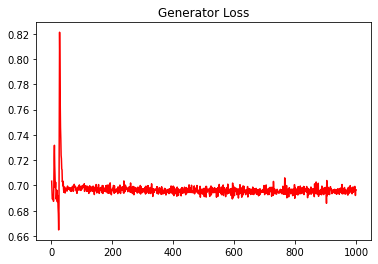

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10076654896071456


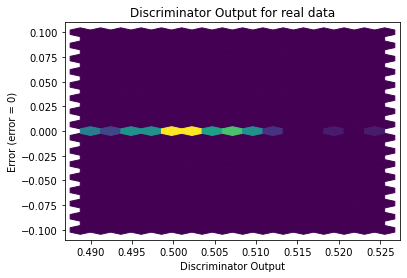

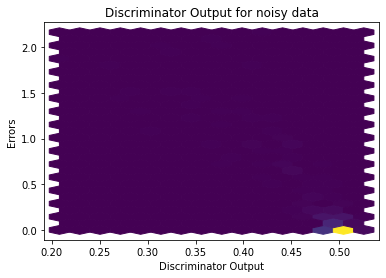

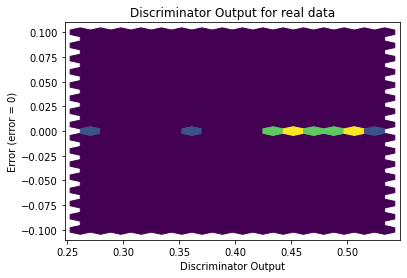

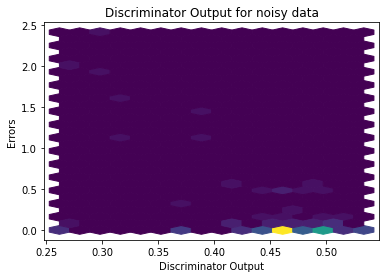

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8007]], requires_grad=True)
